OG AUTHOR: https://www.kaggle.com/code/majedahalrwaily/crime-prediction-using-machine-learning/notebook

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Loading the data

In [4]:
df = pd.read_csv("Crime_Reports.csv")
df.head()

/var/folders/ds/y506zm_56zv14d0zsmmsnz_c0000gn/T/ipykernel_88195/2898757499.py:1: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crime_Reports.csv")


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20072790876,DISTURBANCE - OTHER,3401,N,10/05/2007 11:00:00 PM,10/05/2007,2300.0,10/06/2007 11:46:00 AM,10/06/2007,1146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20065065520,FRAUD - OTHER,1199,N,11/14/2006 12:00:00 AM,11/14/2006,0.0,11/14/2006 12:00:00 AM,11/14/2006,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20041101771,PROWLER,3414,N,04/20/2004 12:30:00 AM,04/20/2004,30.0,04/20/2004 12:30:00 AM,04/20/2004,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003421480455,CUSTODY ARREST TRAFFIC WARR,3722,N,05/28/2003 08:16:00 AM,05/28/2003,816.0,05/28/2003 08:16:00 AM,05/28/2003,816.0,...,NaN,N,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,20052602038,DOC UNREASONABLE NOISE,2405,N,NaN,09/17/2005,NaN,09/17/2005 09:45:00 PM,09/17/2005,2145.0,...,NaN,NaN,10/17/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353826 entries, 0 to 2353825
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

In [6]:
df.shape

(2353826, 27)

In [27]:
df['year'] = pd.DatetimeIndex(df['Occurred Date Time']).year
df = df.loc[df['year'] > 2011]

In [30]:
df['month'] = pd.DatetimeIndex(df['Occurred Date Time']).month


<AxesSubplot:>

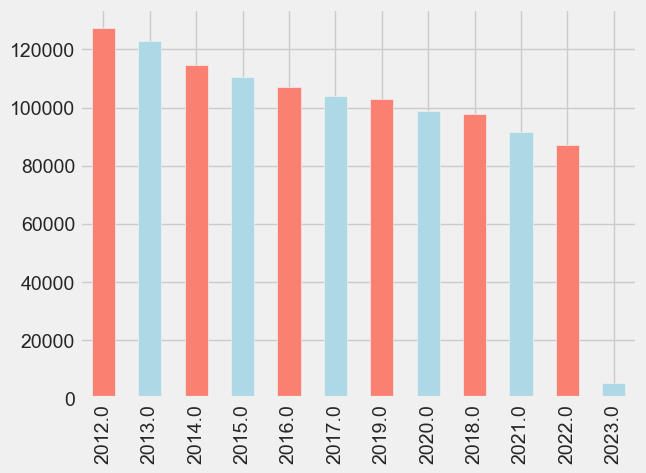

In [28]:
df['year'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

<AxesSubplot:>

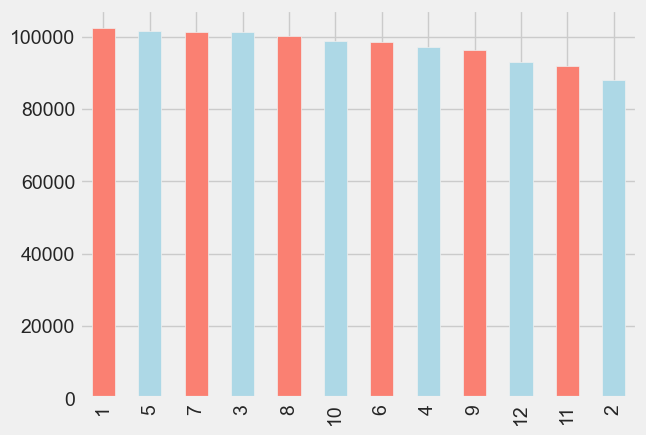

In [31]:
df['month'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])


In [11]:
df.isna().sum()


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 137
Occurred Date                        0
Occurred Time                       60
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    18837
Address                             13
Zip Code                         12465
Council District                 44483
APD Sector                        7073
APD District                      7664
PRA                               9061
Census Tract                     20539
Clearance Status                603198
Clearance Date                  334759
UCR Category                   1490979
Category Description           1490979
X-coordinate                      8494
Y-coordinate                      8487
Latitude                         39610
Longitude                

* # 2. Correlation Matrix**

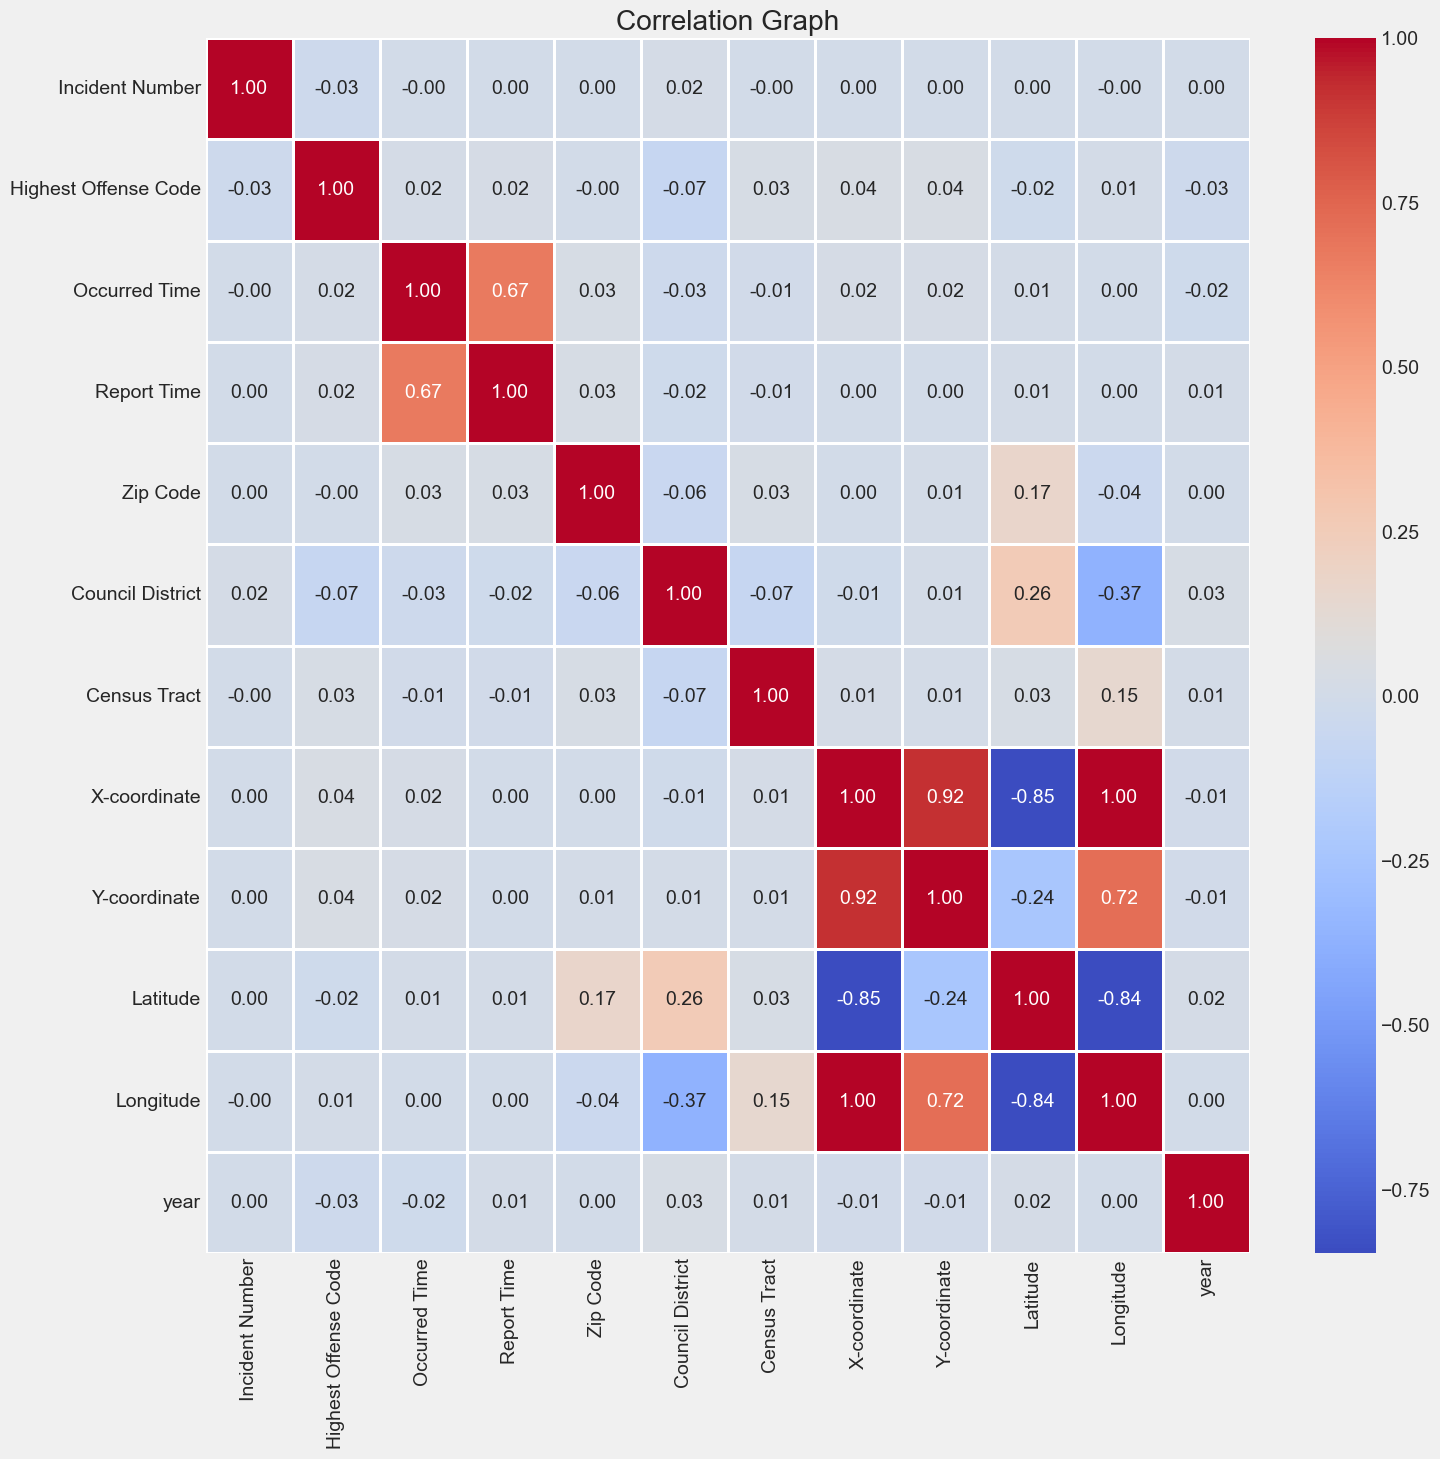

In [29]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

 * # 3. Data Processing
Perform Feature Standerd Scalling

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [16]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['year']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [17]:
df.head()


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
0,20072790876,DISTURBANCE - OTHER,3401,N,10/05/2007 11:00:00 PM,10/05/2007,2300.0,10/06/2007 11:46:00 AM,10/06/2007,1146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.870755
1,20065065520,FRAUD - OTHER,1199,N,11/14/2006 12:00:00 AM,11/14/2006,0.0,11/14/2006 12:00:00 AM,11/14/2006,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.049661
2,20041101771,PROWLER,3414,N,04/20/2004 12:30:00 AM,04/20/2004,30.0,04/20/2004 12:30:00 AM,04/20/2004,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.407472
3,2003421480455,CUSTODY ARREST TRAFFIC WARR,3722,N,05/28/2003 08:16:00 AM,05/28/2003,816.0,05/28/2003 08:16:00 AM,05/28/2003,816.0,...,N,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-1.586377
4,20052602038,DOC UNREASONABLE NOISE,2405,N,NaN,09/17/2005,NaN,09/17/2005 09:45:00 PM,09/17/2005,2145.0,...,NaN,10/17/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Applying machine learning algorithms

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
import seaborn as sns
classes=['healthy','Un-healthy']

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
       # recall=recall_score(y_train, pred) 
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        sns.heatmap(confusion_matrix(y_test, pred), annot= True, cmap='YlGnBu',fmt = 'g')
        print(classification_report(y_test,pred))
        cm=(confusion_matrix(y_test,pred))
       # ax.xaxis.set_label_position('top')
        plt.tight_layout()
        plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
       # print(cm)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('Sensitivity (TPR) : ',TPR)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        print('Specificity (TNR) : ',TNR)
        # Overall accuracy
        print(" Overall accuracy")
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('Accuracy : ',ACC)
        print("Accuracy: {:.4f}".format(acc))
        print("Average Sensitivity: {:.4f}".format(sensitivity))
        print("Average Specificity: {:.4f}".format(specificity))
        print('\n')
        
        conf_matrix=cm
        print("=========================================")
        # save confusion matrix and slice into four pieces
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        print('True Positives:', TP)
        print('True Negatives:', TN)
        print('False Positives:', FP)
        print('False Negatives:', FN)

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

        # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        print('-'*50)
        print(f'Accuracy: {round(conf_accuracy,2)}') 
        print(f'Mis-Classification: {round(conf_misclassification,2)}') 
        print(f'Sensitivity: {round(conf_sensitivity,2)}') 
        print(f'Specificity: {round(conf_specificity,2)}') 
        print(f'Precision: {round(conf_precision,2)}')
        print(f'f_1 Score: {round(conf_f1,2)}')

# Function to plot ROC and Precision Recall Curve for combination of all models


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('year', axis=1)
y = df.year

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. K-nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

ValueError: could not convert string to float: 'EXPIRED-ATT OBT CONT SUB FRAUD'

1. #  2. Decision Tree Classifier 

In [25]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0, probability=True)
svm_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'EXPIRED-ATT OBT CONT SUB FRAUD'

In [ ]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(hidden_layer_sizes=(10,50),momentum=0.9,solver='sgd',random_state=42)
               
NN.fit(X_train, y_train)

print_score(NN, X_train, y_train, X_test, y_test, train=True)
print_score(NN, X_train, y_train, X_test, y_test, train=False) 